## Use case: statistical analysis
Spatial or temporal averages for a defined time period and/or region on hydrology related data


In [32]:
import xarray as xr
import os
import sys
import pandas as pd
import numpy as np
import yaml 
import geopandas

import matplotlib.pyplot as plt

In [2]:
import seaborn as sns  # noqa, pandas aware plotting library

In [3]:
'SP_SRC' in os.environ
sys.platform

'win32'

In [4]:
if ('SP_SRC' in os.environ):
    root_src_dir = os.environ['SP_SRC']
elif sys.platform == 'win32':
    root_src_dir = r'C:\Users\sin17h\Documents\silverpieces'
else:
    root_src_dir = '/home/sin17h/Documents/silverpieces'

pkg_src_dir = root_src_dir
sys.path.append(pkg_src_dir)

In [5]:
from silverpieces import *
from silverpieces.functions import *

In [6]:
if ('SP_DATA' in os.environ):
    root_data_dir = os.environ['SP_DATA']
elif sys.platform == 'win32':
    root_data_dir = r'C:\Temp\awraData\base_files'
else:
    root_data_dir = '/home/sin17h/temp/awraData'


In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# the default cmap_sequential for xarray is viridis. 'RdBu' is divergent, but works better for wetness concepts
# # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
xr.set_options(cmap_sequential='coolwarm')

In [42]:
awra_daily_files_path = os.path.join(root_data_dir, 'e0_avg_*.nc')
awra_daily = xr.open_mfdataset(awra_daily_files_path)

In [43]:
#we have loaded the complete daily AWRA Potential evapotranspiration (PET) dataset, from 1911 to 2105
awra_daily

<xarray.Dataset>
Dimensions:    (latitude: 681, longitude: 841, time: 38351)
Coordinates:
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
  * time       (time) datetime64[ns] 1911-01-01 1911-01-02 ... 2015-12-31
Data variables:
    e0_avg     (time, latitude, longitude) float32 dask.array<shape=(38351, 681, 841), chunksize=(365, 681, 841)>
Attributes:
    var_name:  e0_avg

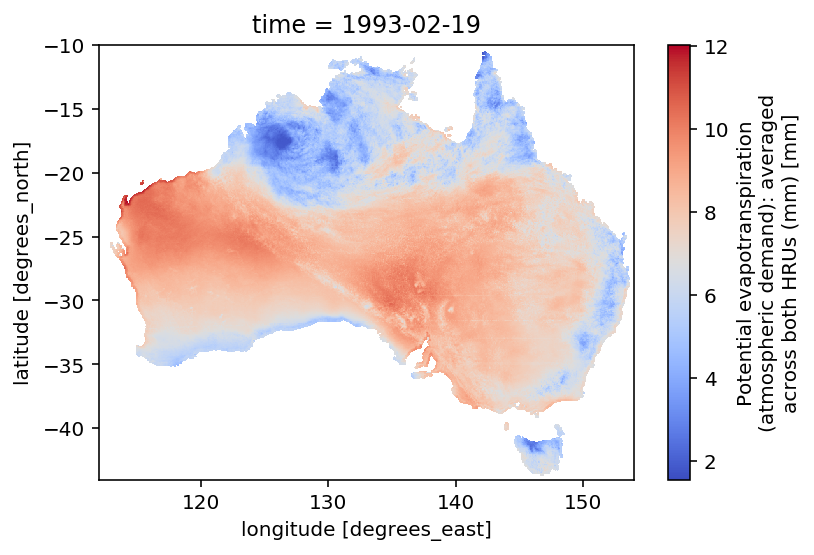

In [10]:
#plot PET for a particular day
awra_daily.e0_avg.isel(time=30000).plot()

In [49]:
%%time
#give me the monthly mean PET for the full period of the dataset. Takes around 3 secs to compute the stats


#Provide a YML file 
ymlStr = """Args: 
                            product: 'AWRA' #fill in the name of the test file created with dummy data
                            timespan:
                                startDate:  
                                endDate:  
                            variablename: 'e0_avg'"""
args_file = yaml.safe_load(ymlStr)
args_file['Args']['product'] = awra_daily_files_path
awra_monthly_mean_full = monthly_mean(args_file)
awra_monthly_mean_full

Wall time: 8.85 s


<xarray.DataArray 'e0_avg' (time: 1260, latitude: 681, longitude: 841)>
dask.array<shape=(1260, 681, 841), dtype=float32, chunksize=(1, 681, 841)>
Coordinates:
  * time       (time) datetime64[ns] 1911-01-31 1911-02-28 ... 2015-12-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0

C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


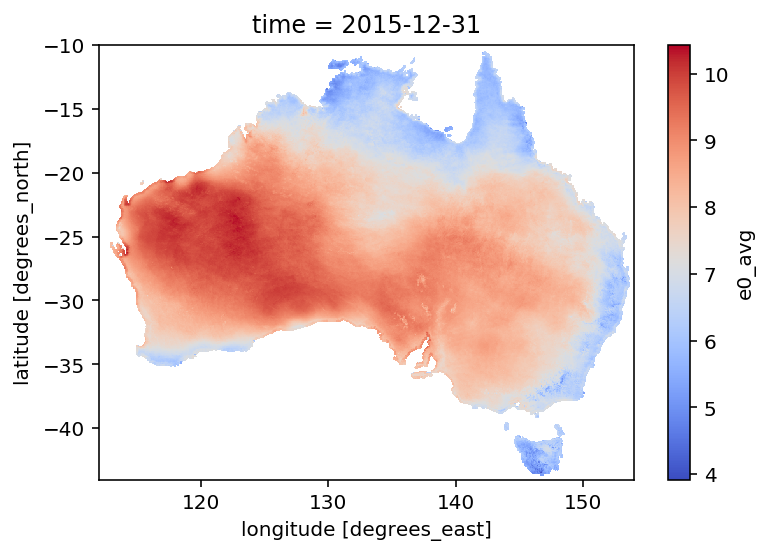

In [12]:
#plot monthly means for Dec 2015
awra_monthly_mean_full.isel(time=1259).plot()

C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


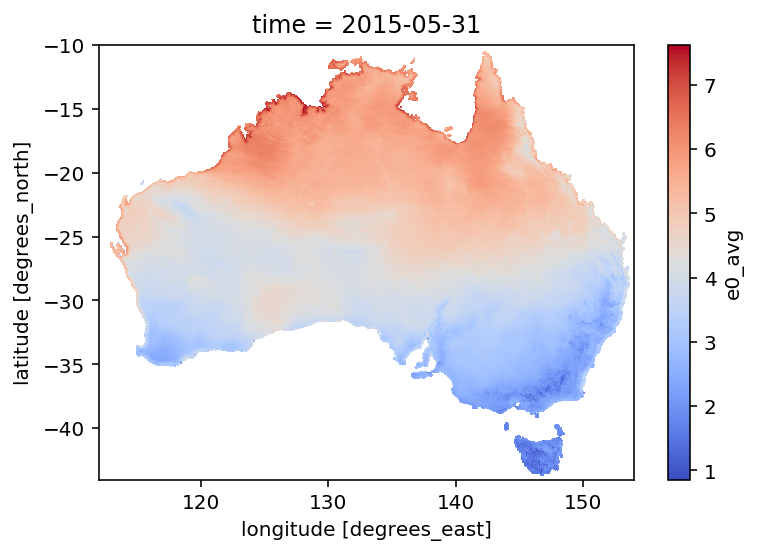

In [13]:
#plot monthly means for July 2015
awra_monthly_mean_full.isel(time=1252).plot()

In [14]:
%%time
awra_seasonal_mean_full = seasonal_mean(args_file)
awra_seasonal_mean_full

Wall time: 1.58 s


<xarray.DataArray 'e0_avg' (time: 421, latitude: 681, longitude: 841)>
dask.array<shape=(421, 681, 841), dtype=float32, chunksize=(1, 681, 841)>
Coordinates:
  * time       (time) datetime64[ns] 1911-02-28 1911-05-31 ... 2016-02-29
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0

C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


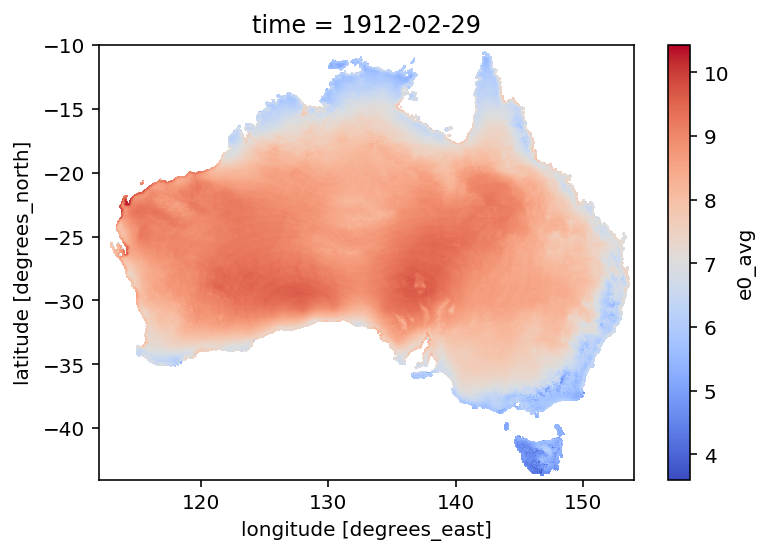

In [15]:
#plot seasonal means for season ending in Feb,1912
awra_seasonal_mean_full.isel(time=4).plot()

C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


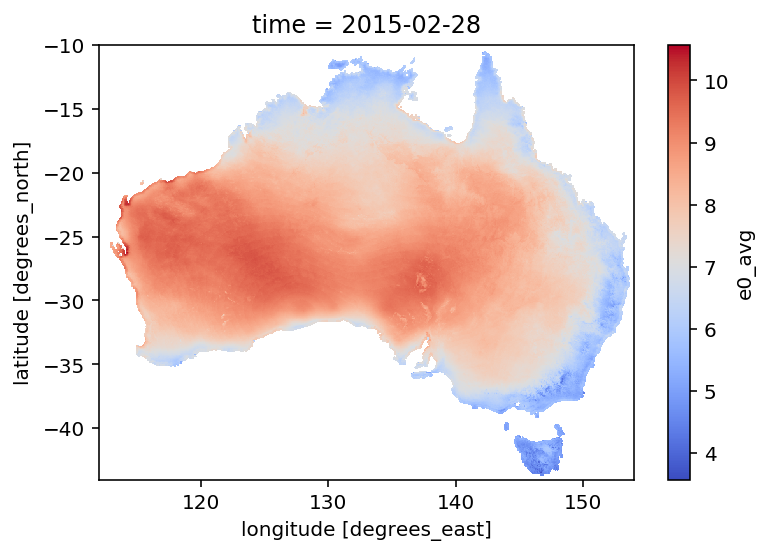

In [16]:
#plot seasonal means for season ending in Feb,2015
awra_seasonal_mean_full.isel(time=416).plot()

C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


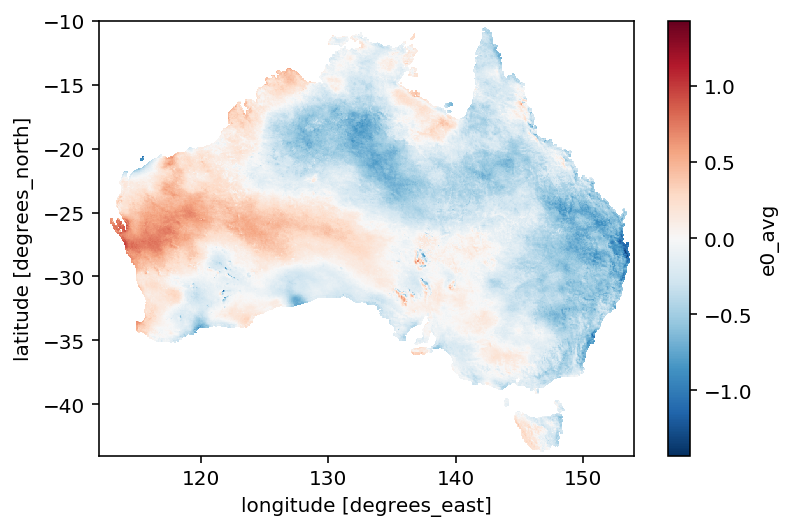

In [17]:
#plot the difference in seasonal mean for season ending Feb, 2015 and Feb, 1912
(awra_seasonal_mean_full.isel(time=416) - awra_seasonal_mean_full.isel(time=4)).plot()

In [18]:
awra_seasonal_mean_full_condensed = awra_seasonal_mean_full.groupby('time.season').mean(dim='time')
awra_seasonal_mean_full_condensed

<xarray.DataArray 'e0_avg' (season: 4, latitude: 681, longitude: 841)>
dask.array<shape=(4, 681, 841), dtype=float32, chunksize=(1, 681, 841)>
Coordinates:
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [20]:
##plotting the condensed seasonal mean, either single plot or facet, takes very long time. 
#I waited for 6 minutes before cancelling

#awra_seasonal_mean_full_condensed.isel(season=1).plot()
#awra_seasonal_mean_full_condensed.plot.imshow(col='season', robust=True)

C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


KeyboardInterrupt: 

In [21]:
awra_yearly_mean_full = yearly_mean(args_file)
awra_yearly_mean_full

<xarray.DataArray 'e0_avg' (time: 105, latitude: 681, longitude: 841)>
dask.array<shape=(105, 681, 841), dtype=float32, chunksize=(1, 681, 841)>
Coordinates:
  * time       (time) datetime64[ns] 1911-12-31 1912-12-31 ... 2015-12-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0

C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


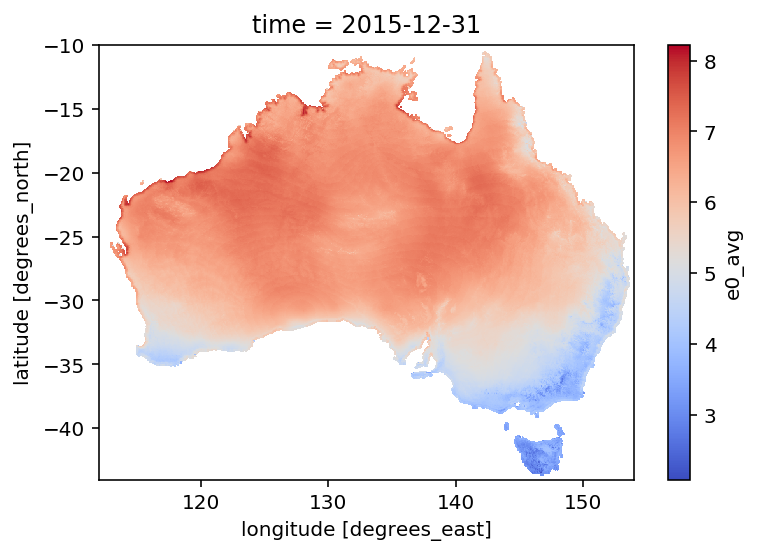

In [22]:
#plot yearly mean for 2015
awra_yearly_mean_full.isel(time=104).plot()

C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


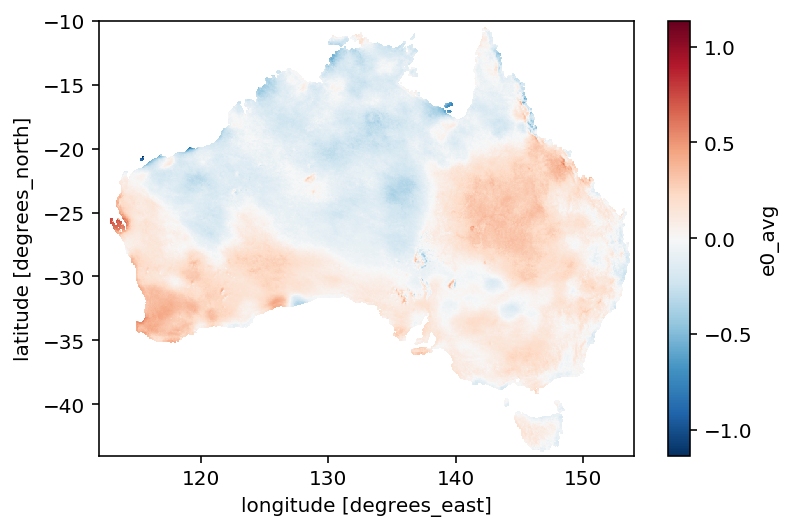

In [23]:
#plot yearly mean difference for year 2015 and 1990
(awra_yearly_mean_full.isel(time=104) - awra_yearly_mean_full.isel(time=79)).plot()

In [24]:
#now cookie-cut the Fritzroy catchment region 
#Provide a YML file 
ymlStr = """Args: 
                            product: 'AWRA' #fill in the name of the test file created with dummy data
                            timespan:
                                startDate:  
                                endDate:  
                            shape_file:  
                            variablename: 'e0_avg'"""
args_file = yaml.safe_load(ymlStr)
args_file['Args']['product'] = awra_daily_files_path

shape_file_path = r'C:\Temp\shapefile_forTest\Fitzroy_GEE_prospective_GW_aquifers_v02.shp'
args_file['Args']['shape_file'] = shape_file_path

awra_fitzroy_monthly_mean_full = monthly_mean(args_file)
awra_fitzroy_monthly_mean_full

<xarray.DataArray 'e0_avg' (time: 1260, latitude: 46, longitude: 73)>
dask.array<shape=(1260, 46, 73), dtype=float32, chunksize=(1, 46, 73)>
Coordinates:
  * time       (time) datetime64[ns] 1911-01-31 1911-02-28 ... 2015-12-31
  * latitude   (latitude) float64 -17.05 -17.1 -17.15 ... -19.2 -19.25 -19.3
  * longitude  (longitude) float64 123.1 123.2 123.2 123.2 ... 126.6 126.7 126.7

C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


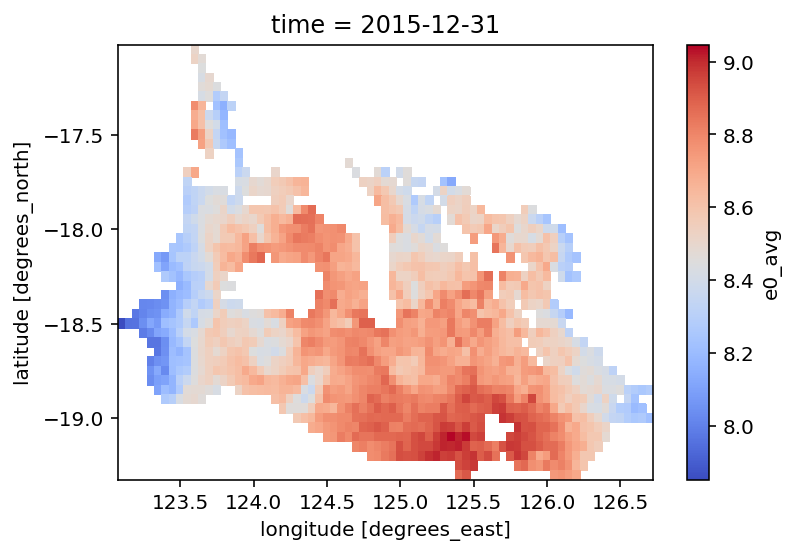

In [25]:
#plot monthly means Fitzroy for Dec 2015
awra_fitzroy_monthly_mean_full.isel(time=1259).plot()

In [26]:
#you can also filter based on a date range
#Provide a YML file 
ymlStr = """Args: 
                            product: 'AWRA' #fill in the name of the test file created with dummy data
                            timespan:
                                startDate: 2015-01-01 
                                endDate:  2015-12-31
                            shape_file:  
                            variablename: 'e0_avg'"""
args_file = yaml.safe_load(ymlStr)
args_file['Args']['product'] = awra_daily_files_path
awra_monthly_mean_daterange = monthly_mean(args_file)
awra_monthly_mean_daterange

<xarray.DataArray 'e0_avg' (time: 12, latitude: 681, longitude: 841)>
dask.array<shape=(12, 681, 841), dtype=float32, chunksize=(1, 681, 841)>
Coordinates:
  * time       (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2015-12-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0

C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sin17h\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\ar

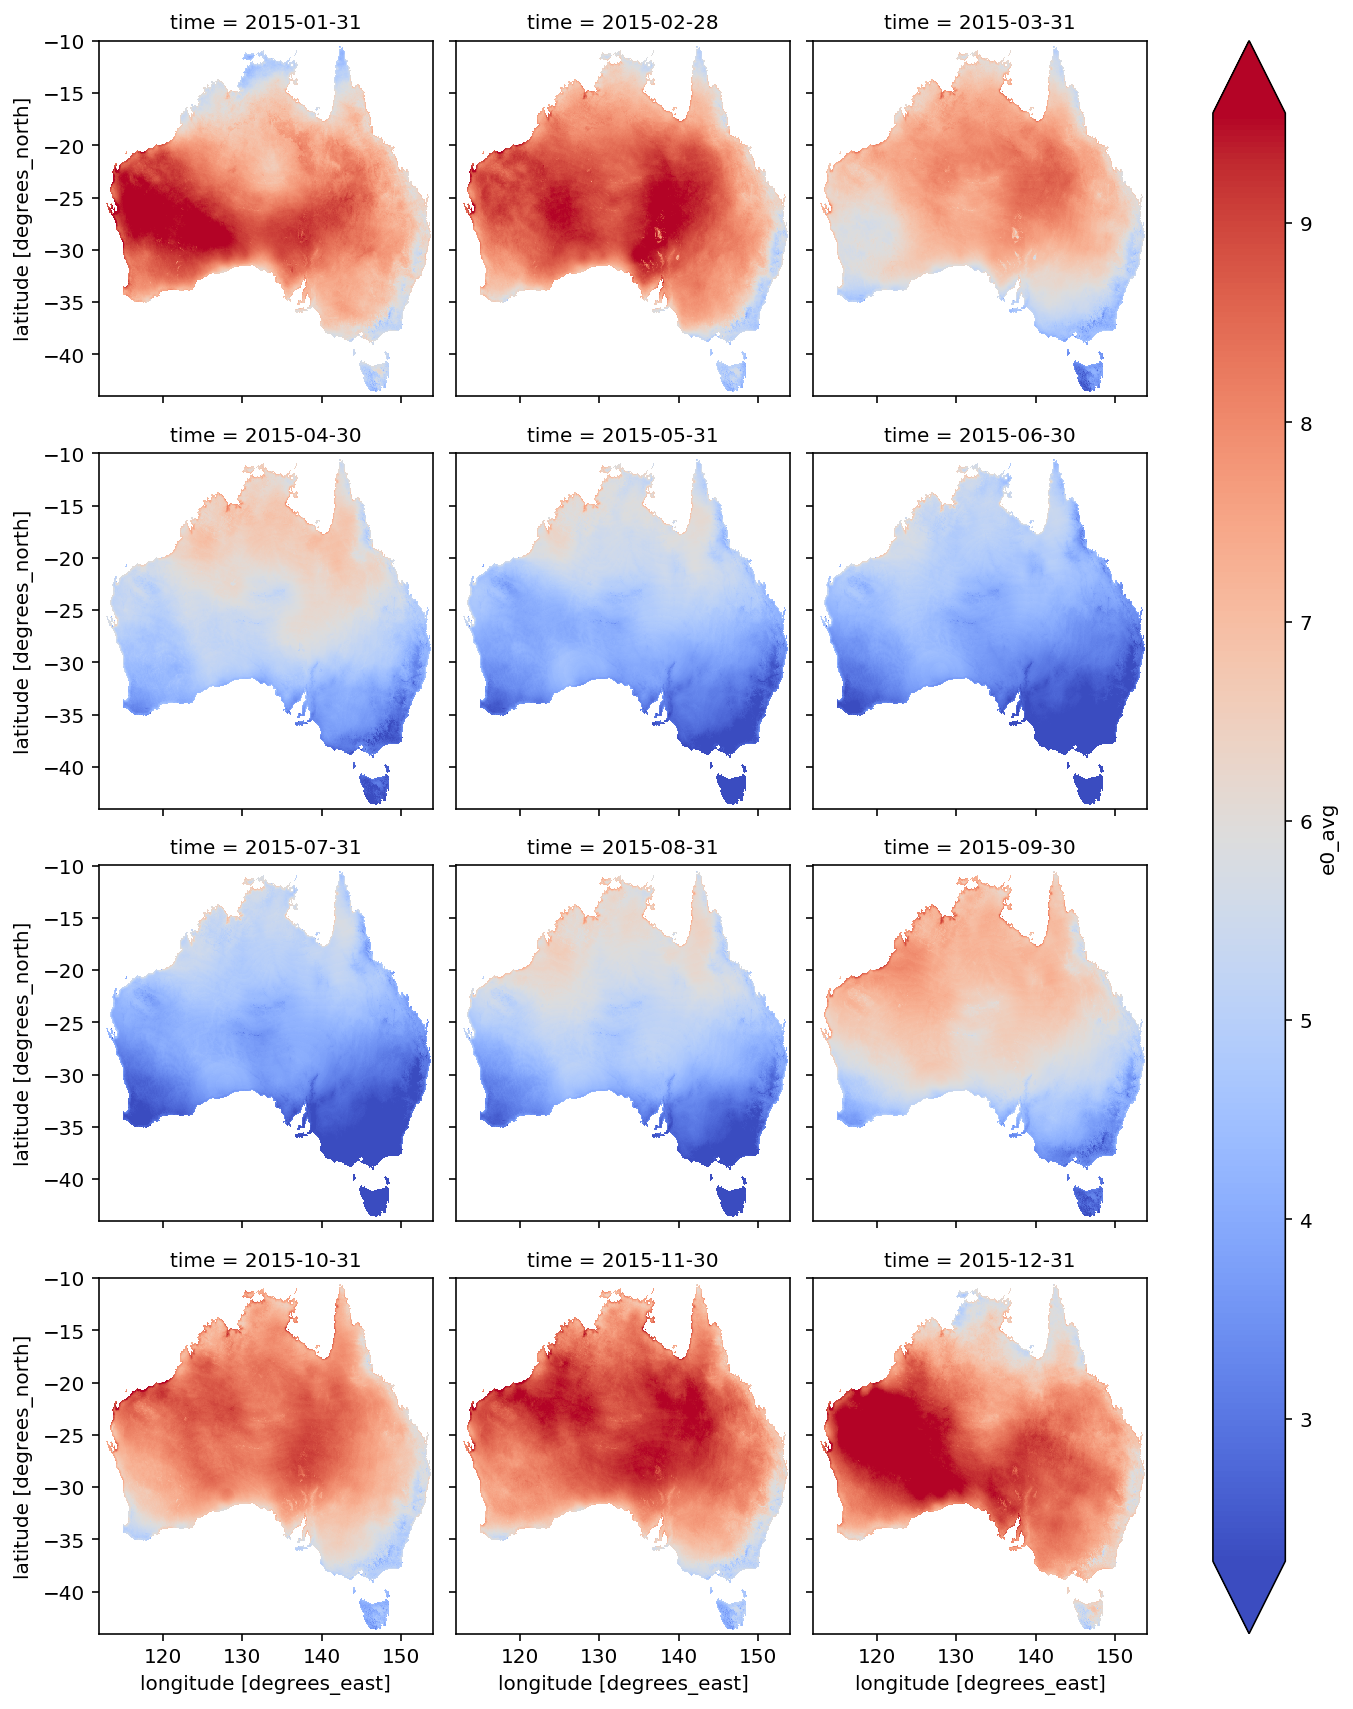

In [31]:
#Facet grid of plots of monthly means of year 2015
awra_monthly_mean_daterange.plot.imshow(col='time', robust=True, col_wrap=3)

In [33]:
#cookie cut with geojson files
df = geopandas.read_file(r'C:\Temp\shapefile_forTest\Fitzroy_GEE_prospective_GW_aquifers_v02.geojson')

In [34]:
df.crs

{'init': 'epsg:4326'}

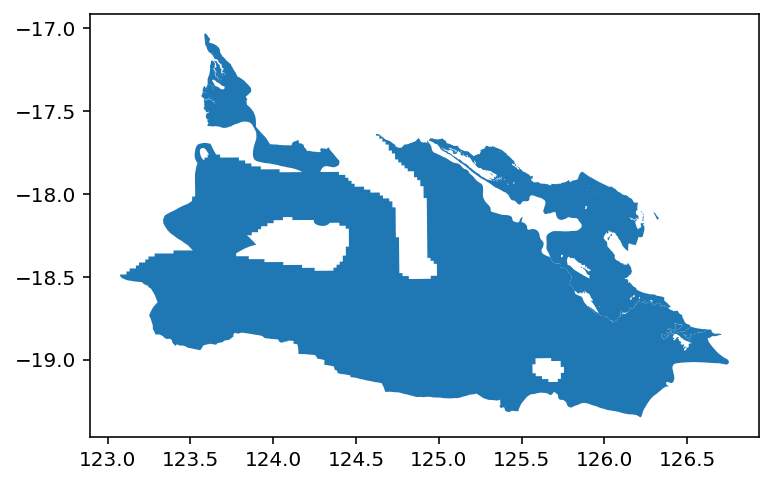

In [36]:
df.plot()

In [39]:
#if we want to use salem with GeoJSON, we have to then write the shp file as an intermediate file to disk, 
#read it back then and proceed with cookie-cutting. GeoPandas does not allow writting the file to memory buffer
#which could 

#df.to_file(r"C:\Temp\shapefile_forTest\geojson_to_shape.shp")
salem.read_shapefile(r"C:\Temp\shapefile_forTest\geojson_to_shape.shp")

,Dissolve,Aquifer,Red,Green,Blue,RGB,Resource,Knowledge,geometry,min_x,max_x,min_y,max_y
0,0,Devonian reef complex,214,157,188,"214,157,188",<10 GL/y,Low,"(POLYGON ((126.53006 -18.92722, 126.53043 -18....",124.93958,126.61705,-18.93281,-17.66319
1,0,Grant Group and Poole Sandstone (<300 m deep),52,143,168,"52,143,168",<120 GL/y,Medium to High,"POLYGON ((124.62305 -17.63761, 124.62353 -17.6...",123.07578,126.75202,-19.34946,-17.63644
2,0,Erskine and Wallal sandstones,93,168,152,"93,168,152",<20 GL/y,Low,"(POLYGON ((124.30458 -18.19316, 124.29991 -18....",123.33449,124.39981,-18.82550,-17.02988


In [ ]:
result_mask = functions.cookie_cut_shapefile(awra_daily, 'Fitzroy_GEE_prospective_GW_aquifers_v02.shp')